Epoch 1/20
235/235 [==============================] - 4s 11ms/step - loss: 0.0663 - val_loss: 0.0388
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0328 - val_loss: 0.0278
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0258 - val_loss: 0.0231
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0221 - val_loss: 0.0204
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0202 - val_loss: 0.0190
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0189 - val_loss: 0.0181
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0179 - val_loss: 0.0172
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0171 - val_loss: 0.0163
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0163 - val_loss: 0.0156
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0155 - val_loss: 0.

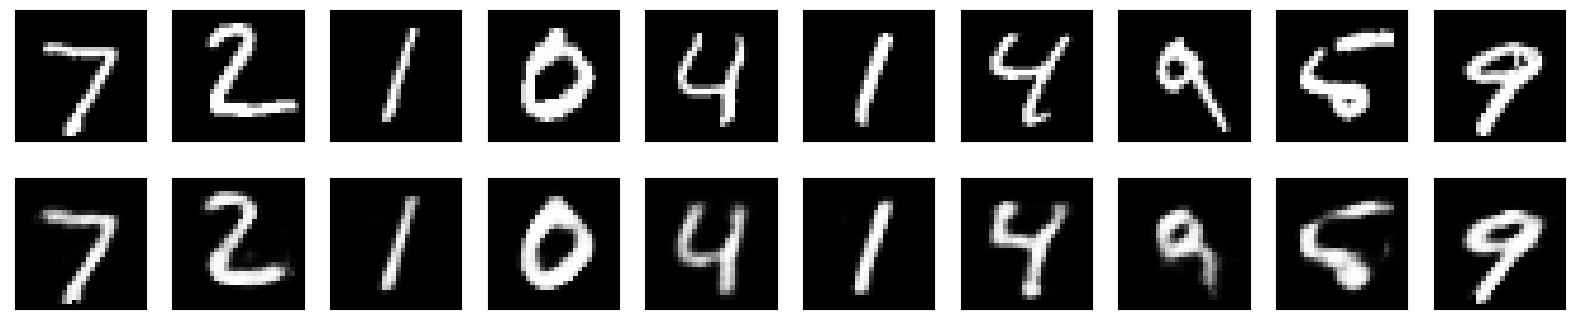

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images into a vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Step 2: Define the architecture of the autoencoder
input_layer = Input(shape=(784,))  # MNIST images are 28x28 pixels

# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Step 3: Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Step 5: Generate and visualize reconstructed images
reconstructed_imgs = autoencoder.predict(x_test)

# Plot some original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
